<a href="https://colab.research.google.com/github/Pranavla/Instagram_analysis/blob/main/Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Importing the dataset**

In [41]:
df=pd.read_csv('/content/Instagram data.csv',encoding = 'latin')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Checking the null values in the dataset

In [42]:
df.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Having an understanding of the data

In [43]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


Checking the datatypes of each columns

In [44]:
df.dtypes

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

# **Data Visualization**

Ploting the distribution of impression from the home

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



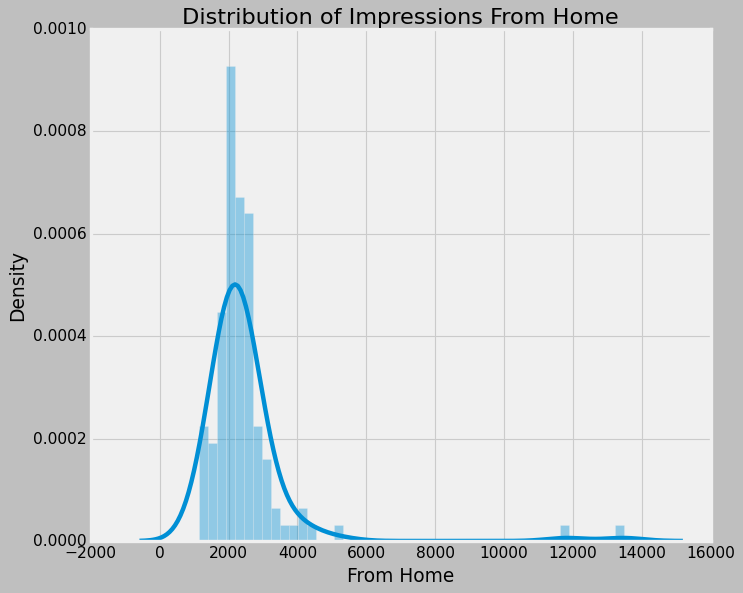

In [45]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Home')
sns.distplot(df['From Home'])
plt.show()

Ploting the distribution of impressions for the hashtags used

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



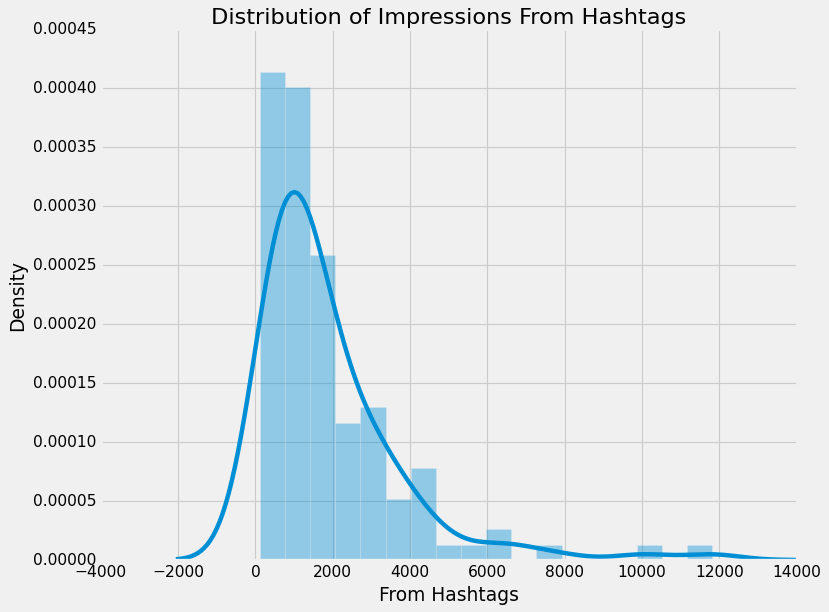

In [46]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

Ploting distribution of impression from explore

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



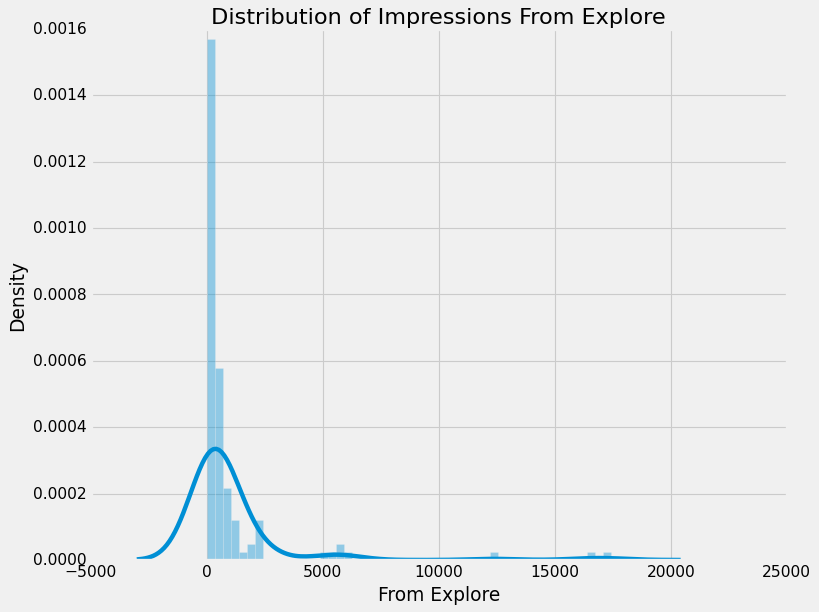

In [47]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df["From Explore"])
plt.show()

Ploting a pie chart for better understanding on the impression recieved from each sources

In [48]:
home=df['From Home'].sum()
hashtags=df['From Hashtags'].sum()
explore=df['From Explore'].sum()
other=df['From Other'].sum()

labels=['From Home','From Hashtags','From Explore','Other']
values=[home,hashtags,explore,other]

fig=px.pie(df,values=values,names=labels,title='Impression on Instagram Posts From Various Sources')
fig.show()

**From the above figure we can understand that most of the impressions recieved are from home(44.1%)** 

Ploting a wordcloud of caption column to see the most used word in the cation of instagram posts

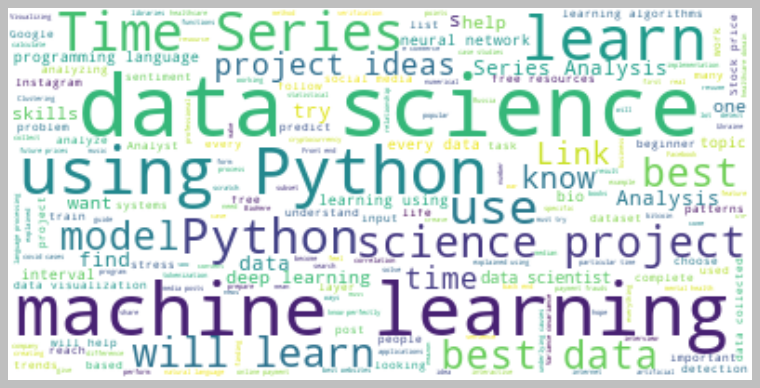

In [49]:
from wordcloud import STOPWORDS,WordCloud,ImageColorGenerator
text=''.join(i for i in df.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Ploting a wordcloud of the hashtags column to see the most used hashtags in the post

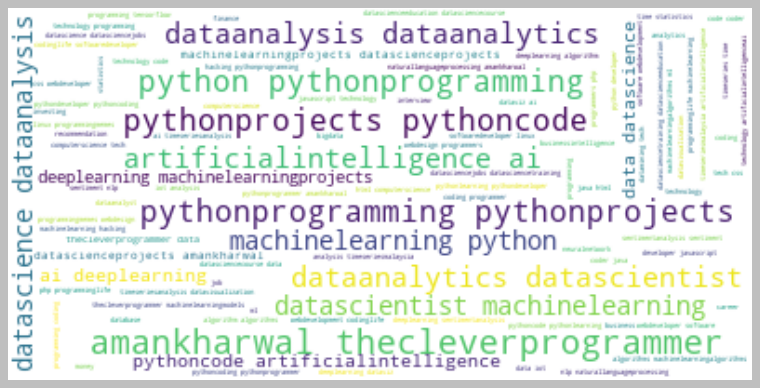

In [50]:
text=" ".join(i for i in df.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**From the wordcloud representations we can now understand that the most used caption is "data science" and the most used hashtag is "#amankharwal the cleverprogrammer"**

Ploting a graphical representation on relatiomship between likes and comment

In [51]:
figure=px.scatter(data_frame=df, x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship Between Likes and Impressions")
figure.show()

Ploting a graph showing relationship between comments and total impressions

In [52]:
figure = px.scatter(data_frame=df, x="Impressions",y="Comments",size="Comments",trendline="ols",title = "Relationship Between Comments and Total Impressions")
figure.show()

Ploting a graph showing relationship between Post saves and total impression

In [53]:
figure=px.scatter(data_frame=df,x="Impressions",y="Saves",size="Saves",trendline="ols",title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Ploting a graph showing relationship between Profile Visits and Followers gained

In [54]:
figure=px.scatter(data_frame=df,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title="Relationship Between Profile Visits and Followers Gained")
figure.show()

Checking the correlation of all the columns with the impression column

In [55]:
correlation=df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


Calculating the correlation rate

In [56]:
conv_rate=(df["Follows"].sum()/df["Profile Visits"].sum())*100
conv_rate

41.00265604249668

# **Seperating X(input) and y(output)**

In [57]:
x=np.array(df[['Likes','Saves','Comments','Shares','Profile Visits', 'Follows']])

In [58]:
y=np.array(df["Impressions"])

# **Splitting the data into training and testing dataset**

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)
X_train

array([[178, 109,   2,   1,   8,   8],
       [138, 174,   5,  15,  17,  12],
       [191, 122,   6,   3,  31,   6],
       [152, 105,   6,   3,  24,   8],
       [373, 573,   2,  38,  73,  80],
       [187, 144,   9,   2,  26,   6],
       [151, 139,  11,   3,  19,   2],
       [114,  67,   3,   3,  30,   4],
       [121, 106,   8,   1,  21,   2],
       [144,  74,   7,  10,   9,   2],
       [190, 174,   6,  11,  12,   8],
       [301, 225,  13,  15, 347,  94],
       [ 82,  49,   6,   3,   8,   2],
       [328, 668,   8,  41,  42,  38],
       [ 86,  34,   6,   0,   4,   2],
       [205, 111,  17,  18,  16,   2],
       [ 96,  38,   3,   5,  37,  12],
       [196,  90,   7,   8,  81,  26],
       [151,  82,   6,   6,  77,  30],
       [124, 135,   4,   9,  12,   6],
       [127,  90,   4,   2,  32,  10],
       [172, 182,  10,  17, 237, 100],
       [118,  70,   4,   2,  22,  16],
       [114,  40,  10,   4,  11,   6],
       [ 72,  40,   8,  20,  10,   0],
       [175, 135,  11,   

# **Model Creation**

Creating a model based on Passive agressive regressor and prediction score is also calculated

In [60]:
from sklearn.linear_model import PassiveAggressiveRegressor
model=PassiveAggressiveRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7424183697081752

# **Implementation**

Giving another input to the model for the prediction of Impression getting on another accounts

In [61]:
#features=[['Likes','Saves','Comments','Shares','Profile Visits','Follows']]
features=np.array([[300,150,220,10,167,135]])
model.predict(features)

array([14080.12741238])